### Conduct EDA and model construction using the master_math_new.csv file that contains all relevant features and target variable

In [2]:
import pandas
pandas.__version__
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
pip install --user scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [4]:
cd /Users/dansari/Documents/GitHub/Identifying-features-to-predict-high-school-assessment-proficiency/Phase1/Data/MASTER

/Users/dansari/Documents/GitHub/Identifying-features-to-predict-high-school-assessment-proficiency/Phase1/Data/MASTER


In [5]:
master_math_new = pandas.read_csv("master_math.csv")
master_math_new['NCESSCH'] = master_math_new['NCESSCH'].apply(lambda x: '{0:0>12}'.format(x))
master_math_new.head().T

,0,1,2,3,4
SCHOOL_YEAR_x,2017-2018,2017-2018,2017-2018,2017-2018,2017-2018
ST_x,AL,AL,AL,AL,AL
NAME,Albertville High School,Asbury High School,Douglas High School,Kate D Smith DAR High School,Brindlee Mountain High School
NCESSCH,010000500871,010000600872,010000600878,010000600883,010000601585
LEVEL,High,High,High,High,High
SCH_TYPE_TEXT_x,Regular School,Regular School,Regular School,Regular School,Regular School
SCH_TYPE_x,1,1,1,1,1
TITLEI_STATUS,SWELIGSWPROG,SWELIGSWPROG,SWELIGSWPROG,SWELIGSWPROG,SWELIGSWPROG
TITLEI_STATUS_TEXT,Title I schoolwide school,Title I schoolwide school,Title I schoolwide school,Title I schoolwide school,Title I schoolwide school
MAGNET_TEXT,No,No,No,No,No


In [7]:
master_math_new.dtypes

SCHOOL_YEAR_x                  object
ST_x                           object
NAME                           object
NCESSCH                        object
LEVEL                          object
SCH_TYPE_TEXT_x                object
SCH_TYPE_x                      int64
TITLEI_STATUS                  object
TITLEI_STATUS_TEXT             object
MAGNET_TEXT                    object
TEACHERS                      float64
FARMS_COUNT                   float64
Special_ed_schl_new           float64
Magnet_schl_new               float64
Charter_Schl_new              float64
Alternate_schl_new            float64
Total_enroll_students         float64
SCH_FTETEACH_TOT              float64
SCH_FTETEACH_CERT             float64
SCH_FTETEACH_NOTCERT          float64
FTE_teachers_count            float64
SalaryforTeachers             float64
Total_SAT_ACT_students        float64
SCH_IBENR_IND_new             float64
Total_IB_students             float64
SCH_APENR_IND_new             float64
SCH_APCOURSE

In [8]:
#corr = master_reading.corr()
#plt.figure(figsize=(20,10))
#sns.heatmap(corr, cmap="Greens",annot=True)

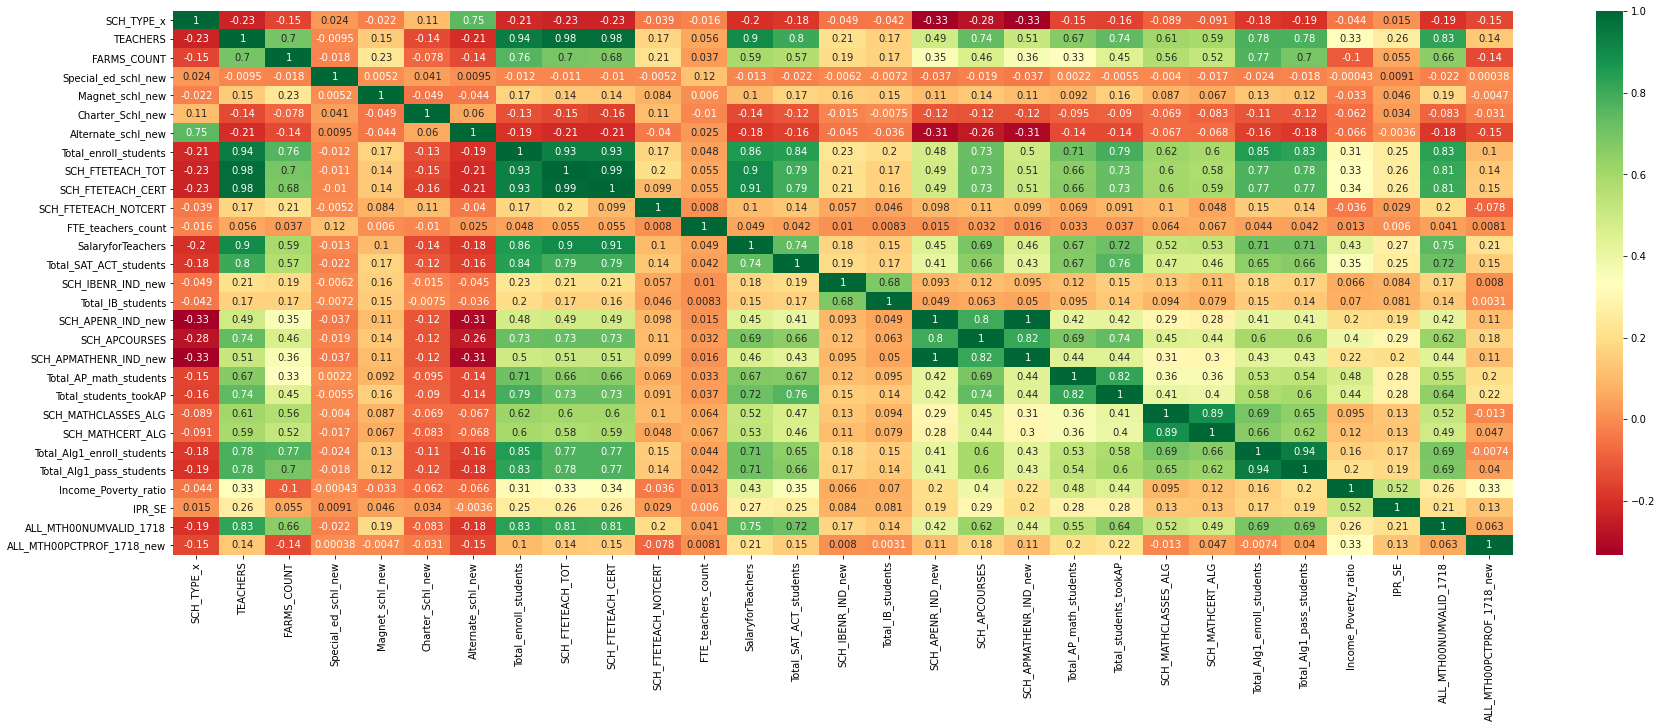

In [9]:
#get correlations of each features in dataset
corrmat = master_math_new.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(30,10))
#plot heat map
g=sns.heatmap(master_math_new[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [10]:
X = master_math_new.iloc[:,11:35]  #independent columns
y = master_math_new.iloc[:,-1]    #target column i.e ALL_RLA00PCTPROF_1718_new

In [12]:
#sns.pairplot(master_math_new)
#plt.show()

In [11]:
#Correlation with output variable
cor_target = abs(corrmat["ALL_MTH00PCTPROF_1718_new"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.25]
relevant_features

Income_Poverty_ratio         0.331375
ALL_MTH00PCTPROF_1718_new    1.000000
Name: ALL_MTH00PCTPROF_1718_new, dtype: float64

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [15]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
accuracy = regressor.score(X_test,y_test)
print(accuracy*100,'%')

24.549646665356185 %


In [16]:
coeff_df = pandas.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
FARMS_COUNT,-0.019325
Special_ed_schl_new,-8.498696
Magnet_schl_new,6.224634
Charter_Schl_new,-0.634271
Alternate_schl_new,-18.553949
Total_enroll_students,0.006149
SCH_FTETEACH_TOT,0.137490
SCH_FTETEACH_CERT,-0.205463
SCH_FTETEACH_NOTCERT,-0.293840
FTE_teachers_count,0.000292


In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
df = pandas.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))